# Practice notebook for multivariate analysis using NHANES data

This notebook will give you the opportunity to perform some multivariate analyses on your own using the NHANES study data.  These analyses are similar to what was done in the week 3 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

## Question 1

Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure ([BPXDI1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI1) and [BPXDI2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI2)).  Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.

          BPXSY1    BPXSY2
BPXSY1  1.000000  0.997949
BPXSY2  0.997949  1.000000
          BPXDI1    BPXDI2
BPXDI1  1.000000  0.990938
BPXDI2  0.990938  1.000000


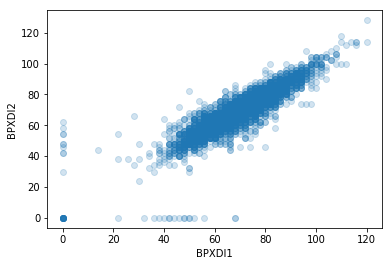

In [21]:
# enter your code here
sns.regplot(da['BPXDI1'], da['BPXDI2'], fit_reg=False, scatter_kws = {'alpha' : 0.2})

print(da[['BPXSY1', 'BPXSY2']].iloc[:3].dropna().corr())
print(da[['BPXDI1', 'BPXDI2']].iloc[:3].dropna().corr())

__Q1a.__ How does the correlation between repeated measurements of diastolic blood pressure relate to the correlation between repeated measurements of systolic blood pressure?

__Q2a.__ Are the second systolic and second diastolic blood pressure measure more correlated or less correlated than the first systolic and first diastolic blood pressure measure?

## Question 2

Log transform the four blood pressure variables and repeat question 1.

            log_BPXSY1  log_BPXSY2
log_BPXSY1    1.000000    0.997881
log_BPXSY2    0.997881    1.000000
            log_BPXDI1  log_BPXDI2
log_BPXDI1    1.000000    0.992618
log_BPXDI2    0.992618    1.000000


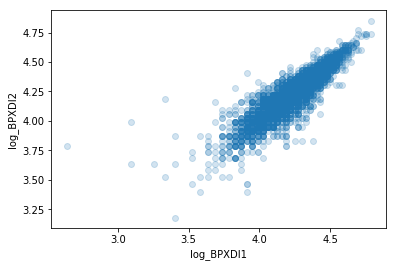

In [20]:
# enter your code here
da['log_BPXSY1'] = np.log(da['BPXSY1'])
da['log_BPXSY2'] = np.log(da['BPXSY2'])
print(da[['log_BPXSY1', 'log_BPXSY2']].iloc[:3].dropna().corr())

da['log_BPXDI1'] = np.log(da['BPXDI1'])
da['log_BPXDI2'] = np.log(da['BPXDI2'])
print(da[['log_BPXDI1', 'log_BPXDI2']].iloc[:3].dropna().corr())
sns.regplot(da['log_BPXDI1'], da['log_BPXDI2'], fit_reg=False, scatter_kws = {'alpha' : 0.2})

__Q2a.__ Does the correlation analysis on log tranformed data lead to any important insights that the correlation analysis on the untransformed data missed?

## Question 3

Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement.  Stratify the plots by gender (rows) and by race/ethnicity groups (columns).

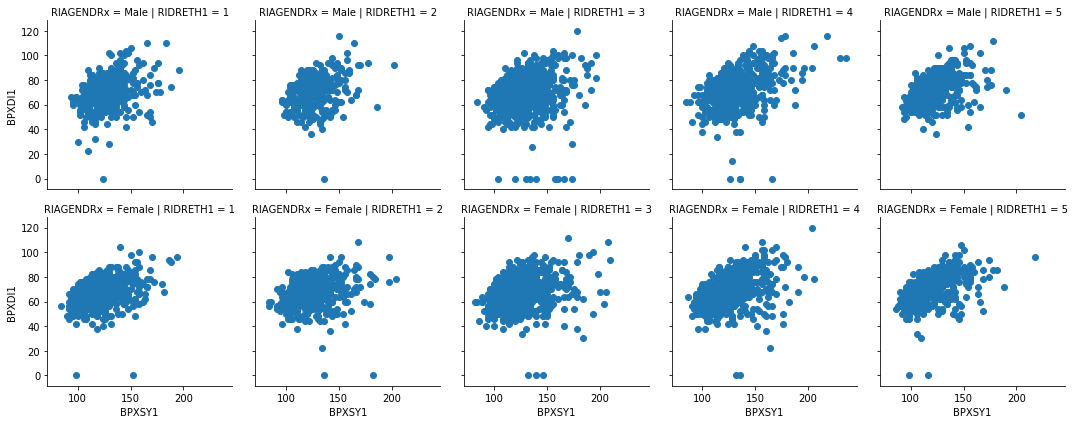

In [31]:
# insert your code here
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"}) 
_ = sns.FacetGrid(da, row = 'RIAGENDRx', col = 'RIDRETH1').map(plt.scatter, 'BPXSY1', 'BPXDI1').add_legend()

__Q3a.__ Comment on the extent to which these two blood pressure variables are correlated to different degrees in different demographic subgroups.

## Question 4

Use "violin plots" to compare the distributions of ages within groups defined by gender and educational attainment.

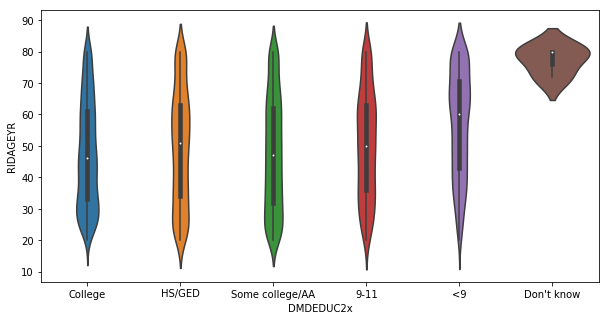

In [36]:
# insert your code here
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
plt.figure(figsize = (10,5))
_ = sns.violinplot(da['DMDEDUC2x'], da['RIDAGEYR'])

__Q4a.__ Comment on any evident differences among the age distributions in the different demographic groups.

## Question 5

Use violin plots to compare the distributions of BMI within a series of 10-year age bands.  Also stratify these plots by gender.

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


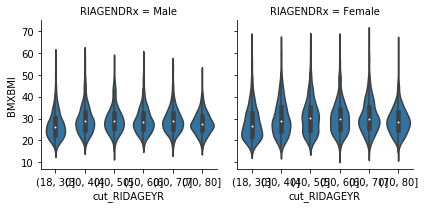

In [62]:
# insert your code here
da['cut_RIDAGEYR'] = pd.cut(da['RIDAGEYR'], [18, 30, 40, 50, 60, 70, 80]).dropna()
_ = sns.FacetGrid(da, col = 'RIAGENDRx').map(sns.violinplot, 'cut_RIDAGEYR', 'BMXBMI')

__Q5a.__ Comment on the trends in BMI across the demographic groups.

## Question 6

Construct a frequency table for the joint distribution of ethnicity groups ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)) and health-insurance status ([HIQ210](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HIQ_I.htm#HIQ210)).  Normalize the results so that the values within each ethnic group are proportions that sum to 1.

In [58]:
# insert your code here
da['HIQ210'].value_counts()

2.0    4268
1.0     456
9.0       8
Name: HIQ210, dtype: int64

__Q6a.__ Which ethnic group has the highest rate of being uninsured in the past year?